# SIMULE EL PRIMER SISTEMA CUÁNTICO DESCRITO EN LA SECCIÓN 4.1.
### Miguel Angel Motta
El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.


In [99]:
import numpy as np
from random import randint as ran
def calcular_probabilidad(vector, j):
    """
    Esta función calcula la probabilidad de observar un estado en la posición j
    del vector de estado.
    
    @param vector: vector de estado cuántico.
    @param j: índice del estado del que se va a calcular la probabilidad.
    @Returns: La probabilidad de observar el estado en la posición j.
    """

    if j < 0 or j >= len(vector):
        raise ValueError("El índice j está fuera del rango del vector")
    
    numerador = np.abs(vector[j])**2
    denominador = np.linalg.norm(vector)**2
    if denominador == 0:
        raise ValueError("Division por cero")
    return (numerador / denominador).item()
def calcular_probabilidad_transicion(vector_a, j):
    """
    Esta función calcula la probabilidad de transitar del primer vector ket al segundo.
    @param vector_a: primer vector (ket a).
    @param vector_b: segundo vector (ket b).
    @Returns: La probabilidad de transitar del ket a al ket b.
    """
    if j < 0 or j >= len(vector_a):
        raise ValueError("El índice j está fuera del rango del vector")
    vector_b = np.array([(0 if i != j else vector_a[i].item()) for i in range(len(vector_a))])
    
    # Normalize
    vector_b /= np.linalg.norm(vector_b)
    vector_b = vector_b / np.linalg.norm(vector_b)
    
    vector_a /= np.linalg.norm(vector_a)
    
    producto_interno = np.vdot(vector_b, vector_a)
    probabilidad = (np.abs(producto_interno))**2

    return probabilidad.item()

def main():
    # Generar 10 vectores de longitud 10 con números complejos aleatorios
    vectores = []
    for _ in range(10):
        vector = np.array([ran(-10, 10) + ran(-10, 10) * 1j for _ in range(10)])
        vectores.append(vector)

    # Probar las funciones y mostrar los resultados
    for i, vector in enumerate(vectores):
        print(f"\nPruebas para el vector {i + 1}:\n")
        print(round(calcular_probabilidad(vector, j), 2))
        print(round(calcular_probabilidad_transicion(vector, j), 4))
if __name__ == "__main__":
    main()



Pruebas para el vector 1:

0.11
0.1055

Pruebas para el vector 2:

0.15
0.1535

Pruebas para el vector 3:

0.11
0.1096

Pruebas para el vector 4:

0.07
0.0736

Pruebas para el vector 5:

0.01
0.0075

Pruebas para el vector 6:

0.11
0.1087

Pruebas para el vector 7:

0.2
0.2009

Pruebas para el vector 8:

0.08
0.0799

Pruebas para el vector 9:

0.06
0.0622

Pruebas para el vector 10:

0.03
0.0317


# COMPLETE LOS RETOS DE PROGRAMACIÓN DEL CAPÍTULO 4.
1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

#
### Solución
1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [37]:
import numpy as np
def amplitud_transicion(v1, v2):
    # Con la formula de 
    bra_v1 = np.conj(v1)
    return np.dot(bra_v1, v2)
v1 = np.array([1+1j, 1-1j])
v2 = np.array([1-1j, 1+1j])
print("--> Amplitud de Transición:", amplitud_transicion(v1, v2))

--> Amplitud de Transición: 0j


#
### 2. 
#### Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.


In [71]:
def punto_2(vectorr, ket):
    if not np.allclose(vectorr, vectorr.conj().T):
        return "La matriz vectorr no es hermítica"
    media = np.dot(ket.conj().T, np.dot(vectorr, ket)).real
    N_Ket = np.dot(vectorr, ket)
    varianza = np.dot(ket.conj().T, np.dot(vectorr, N_Ket)).real - media ** 2
    return media, varianza
vectorO = np.array([[1, 1j], [-1j, 2]])  
K = np.array([np.sqrt(2)/2, np.sqrt(2)/2j])
M, V = punto_2(vectorO, K)
print("MEDIA:", round(M.item(), 2))
print("VARIANZA ESTANDAR:", V.item())

MEDIA: 2.5
VARIANZA ESTANDAR: 0.25


#
### 3.
#### El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [39]:
def valores_propios_probabilidad_transicion(matriz_observable):
    valores_propios, vectores_propios = np.linalg.eig(matriz_observable)
    probabilidades_transicion = np.abs(vectores_propios) ** 2
    return valores_propios, probabilidades_transicion

valores_propios, probabilidades_transicion = valores_propios_probabilidad_transicion(matriz_observable)
print("Valores propios del obServable:", valores_propios)
print("Probabilidad de transición a cada vector propio:", probabilidades_transicion)

Valores propios del obServable: [0.38196601+0.j 2.61803399+0.j]
Probabilidad de transición a cada vector propio: [[0.7236068 0.2763932]
 [0.2763932 0.7236068]]


#
### 4. 
#### Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [45]:
def dinamica_sistema(matrices_Un, estado_inicial):
    estado_final = estado_inicial
    for matriz in matrices_Un:
        estado_final = np.dot(matriz, estado_final)
    return estado_final

matrices_Un = [np.array([[1, 0], [0, 1]]), np.array([[0, 1], [1, 0]])]
estado_inicial = np.array([1, 0])
estado_final = dinamica_sistema(matrices_Un, estado_inicial)
print("Respuesta:", estado_final)


Respuesta: [0 1]


# REALICE LOS SIGUIENTES PROBLEMAS E INCLUYALOS COMO EJEMPLOS
## Modele en su librería los problemas
### 4.3.1
    Encuentre todos los estados posibles del sistema descrito en el Ejercicio 4.2.2 puede realizar la transición después de que se haya realizado una medición.
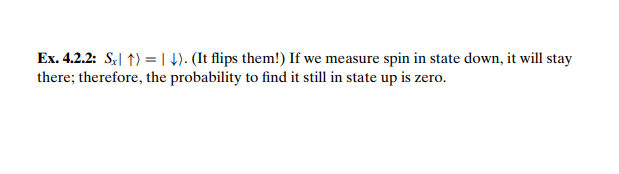


In [58]:
import numpy as np

def aplicar_operador_Sx(estado):
    operador_Sx = np.array([[0, 1], [1, 0]]) 
    return np.dot(operador_Sx, estado)

def estados_posibles_despues_medicion():
    estado_inicial = np.array([1, 0])  # Estado inicial |↑⟩
    resultado_medicion = np.random.choice([0, 1], p=[1, 0])  
    if resultado_medicion == 0:
        return [np.array([0, 1])]  
        estado_despues_Sx = aplicar_operador_Sx(estado_inicial)
        return [estado_despues_Sx]  
posibles_estados = estados_posibles_despues_medicion()

print("Estados posibles después de la medición:") 
for i, estado in enumerate(posibles_estados):
    print(f"Estado {i+1}: {estado}")
print("\n")

#/////////////////////////////
import numpy as np

def calculateS(estado):
    operador_Sx = np.array([[0, 1], [1, 0]]) 
    return np.dot(operador_Sx, estado)

def CalculateStates():
    e0 = np.array([1, 0])  # Estado inicial |↑⟩
    result = np.random.choice([0, 1], p=[1, 0])  
    if result == 0:
        return [np.array([0, 1])]  
        newState = calculateS(e0)
        return [newState]  
posibles_estados = CalculateStates()

print("Estados posibles después de la medición:") 
for i, estado in enumerate(posibles_estados):
    print(f"Estado {i+1}: {estado}")
print("\n")


Estados posibles después de la medición:
Estado 1: [0 1]




#
### 4.3.2
    Realice los mismos cálculos que en el último ejemplo, utilizando el Ejercicio   4.3.1. Luego dibuje la distribución de probabilidad de los valores propios como en el ejemplo anterior.

Probabilidad p1: 0.5
Probabilidad p2: 0.5
Valor medio: 0.0


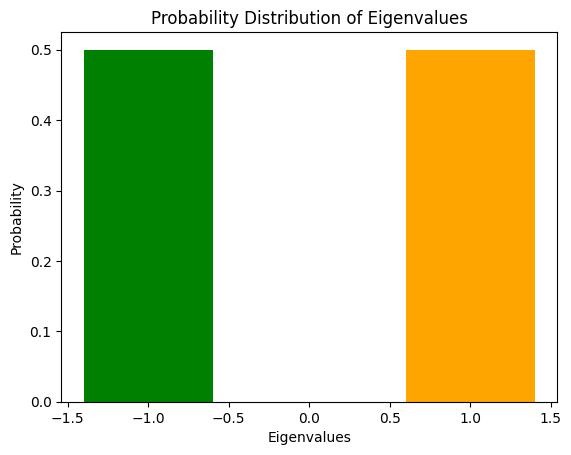

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_probabilidad(eigenvector):
    return np.linalg.norm(eigenvector) ** 2  /2

def calcular_valor_medio(eigenvalues, probabilities):
    return sum(prob * eig_val for prob, eig_val in zip(probabilities, eigenvalues))

# Definición de los eigenvectores y eigenvalores
eigenvector1 = np.array([1, 0])
eigenvector2 = np.array([0, 1])
lambda1 = 1
lambda2 = -1

# Cálculo de las probabilidades
p1 = calcular_probabilidad(eigenvector1)
p2 = calcular_probabilidad(eigenvector2)

# Cálculo del valor medio
valor_medio = calcular_valor_medio([lambda1, lambda2], [p1, p2])


# Imprimir resultados
print("Probabilidad p1:", p1)
print("Probabilidad p2:", p2)
print("Valor medio:", valor_medio)

# Dibujar la distribución de probabilidad
eigenvalues = [lambda1, lambda2]
probabilities = [p1, p2]

plt.bar(eigenvalues, probabilities, color=['orange', 'green'])
plt.xlabel('Eigenvalues')
plt.ylabel('Probability')
plt.title('Probability Distribution of Eigenvalues')
plt.show()



    

### 4.4.1
    Compruebe que:
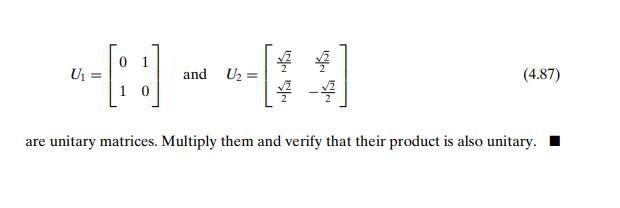



In [76]:
def punto_4(matriz):
    if matriz.shape[0] != matriz.shape[1]:
        return False
    identity = np.eye(matriz.shape[0])
    product = np.dot(matriz, matriz.conj().T)
    return np.allclose(product, identity)
    
M1 = np.array([[0, 1], [1, 0]])
M2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2],
               [np.sqrt(2)/2,-np.sqrt(2)/2]])
result= np.dot(M1,M2)
print("M 1 Unitaria", punto_4(M1))
print("M2 Unitaria", punto_4(M2))
print("Producto UNITARIO:", punto_4(result))

M 1 Unitaria True
M2 Unitaria True
Producto UNITARIO: True


### 4.4.2
    Vuelva al Ejemplo 3.3.2 (bola de billar cuántica), mantenga lo mismo vector de estado inicial [1, 0, 0, 0]T, pero cambie el mapa unitario a:
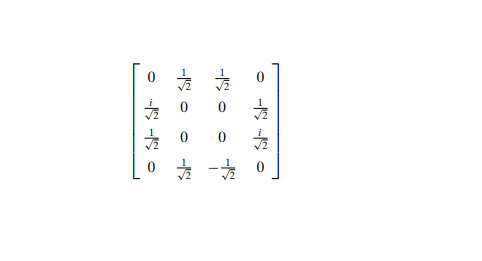

    Determine el estado del sistema después de tres pasos de tiempo. ¿Cuál es la posibilidad de la bola cuántica que se encuentra en el punto 3

In [91]:
import numpy as np

def calcular_probabilidad(click, estado_deseado):
    norma = np.linalg.norm(click)
    probabilidad = np.abs(click[estado_deseado]) ** 2 / (norma ** 2)
    return probabilidad
def realizar_clics(m1, v1, num_clics):
    estado_actual = v1
    for _ in range(num_clics):
        estado_actual = np.dot(m1, estado_actual)
    return estado_actual
m1 = np.array([[0, 1/np.sqrt(2), 1/np.sqrt(2), 0], 
               [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)], 
               [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
               [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]])
v1 = np.array([[1], [0], [0], [0]])
click3 = realizar_clics(m1, v1, 3)
print("Resultado después de tres clics:\n")
for j in click3:
    print(j.item())
probabilidad_punto3 = calcular_probabilidad(click3, 2)  # El punto 3 corresponde al tercer índice en Python (índice 2)
print("\nLa probabilidad de la bola cuántica en el punto 3 es:\n", probabilidad_punto3)


Resultado después de tres clics:

0j
(-0.7071067811865474+0.7071067811865474j)
0j
0j

La probabilidad de la bola cuántica en el punto 3 es:
 [0.]


#
### El Entrelazamiento Cuántico y su Impacto en la Interpretación de la Realidad

El entrelazamiento cuántico, como se describe por la mecánica cuántica, plantea interrogantes profundos sobre la naturaleza misma de la realidad y la relación entre las partículas cuánticas. El entrelazamiento implica una relación instantánea y no local entre las propiedades de partículas separadas a distancias arbitrarias. Pero cómo puede ser esto, ya que físicamente es inconsevible y los seres humanos hemos basado nuestro conocimiento en la experimentación, pero hemos llegado a un punto que raya los límites de la realidad observable  ¿Cómo reconciliamos este fenómeno con nuestra comprensión clásica del mundo?

#### Descripción del Entrelazamiento Cuántico

El entrelazamiento cuántico se manifiesta cuando el estado de un sistema compuesto no puede ser descrito independientemente por los estados de sus componentes individuales. Tomemos, por ejemplo, el siguiente estado entrelazado de dos partículas:

$
|\psi\rangle = |x_0\rangle \otimes |y_0\rangle + |x_1\rangle \otimes |y_1\rangle
$

Este estado representa una superposición de dos estados separados, $(|x_0\rangle \otimes |y_0\rangle y |x_1\rangle \otimes |y_1\rangle$, donde las partículas $x\) y 
(y$ están entrelazadas de alguna manera.

#### Implicación Existencial

1. **La Realidad No Local**: El entrelazamiento cuántico desafía nuestra comprensión clásica de la realidad al sugerir que las partículas pueden influenciarse instantáneamente a distancias arbitrarias, violando la noción de la realidad como la conocemos, deformando todo aquello que era familiar a nuestro entendimiento.

2. **Aplicaciones en Tecnología Cuántica**: Aunque el entrelazamiento plantea desafíos para nuestra intuición clásica, también es la base de tecnologías cuánticas prometedoras, como la criptografía cuántica y la teleportación cuántica. Aunque esto, más parece una fantasía, la criptografía se ha visto fuertemente amenazada por la capacidad de las computadoras cuánticas de descifrar contraseñas descomponiendo sus direcciones de factores primos. La solución estandarizada a este problema es con la implementación de vectores de 3 dimensiones con aproximaciones para guardar y proteger la información de nuestras contraseñas.

3. **Interpretaciones de la Mecánica Cuántica**: El entrelazamiento cuántico ha llevado a una variedad de interpretaciones de la mecánica cuántica, desde la interpretación de Copenhague hasta la teoría de los muchos mundos. ¿Cuál ofrece la mejor descripción de la realidad?

#### Preguntas para Reflexionar

- ¿Cómo podemos reconciliar el entrelazamiento cuántico con nuestra comprensión clásica del espacio y el tiempo?
- ¿Qué implicaciones tiene el entrelazamiento cuántico para nuestra comprensión de la información y la computación?

El entrelazamiento cuántico es facinante, desafiante y en muchas formas, un misterio, puesto que no hemos podido comprobar a ciencia cierta muchas características que el entrelazamiento cuántico presenta, pero es cuestión de tiempo para que descubramos los límites de la realidad que representa el universo cuántico.
